# Appliances Energy Prediction

## Data Description
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. 
Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. 
Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters)

## Environment Setup

Loading library packages

In [38]:
# Haandling request errors
from urllib.error import URLError

#Notebook visual  side effects
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd

# Data manipulation and analysis
import pandas as pd
import numpy as np # Numerical analysis and computation

# Visualization
import matplotlib.pyplot as plt # Basic MATLAB-inspired visualization
import seaborn as sns # More aesthetic viz.
sns.set()

# OS operations
import os
from pathlib import Path # Platform-agnostic file path handling

# Set library options
pd.set_option('max_columns', None) # No limit cap on dataframe column display
pd.set_option('max_colwidth', None) # Limitless column width

# Reproducibility
import random
SEED = 2022
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = '{}'.format(SEED)

## Loading DATA

In [8]:
HOME_PATH = Path.cwd()

LOCAL_DATA_URI = HOME_PATH / 'data' / 'energydata_complete.csv' # as pathlib.Path object
LOCAL_DATA_FILE_PATH = str(HOME_PATH) # As string representation

REMOTE_DATA_URI = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'

### Reading DATA

In [17]:
try:
    energy_data = pd.read_csv(REMOTE_DATA_URI, encoding='latin',parse_dates=['date'])
except URLError as e:
    energy_data = pd.read_csv(LOCAL_DATA_FILEPATH, encoding='latin',parse_dates=['date'])
else:
    ipd.display(energy_data.head())

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Exploratory Data Analysis

In [32]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Check for null values

In [35]:
energy_data.isnull().sum().sort_values().head(5)

date          0
Tdewpoint     0
Visibility    0
Windspeed     0
RH_out        0
dtype: int64

Seems there are no null values and almost all are numeric values

Show feature correlation

In [66]:
corr_matrix = energy_data.iloc[:,3:-2].corr()

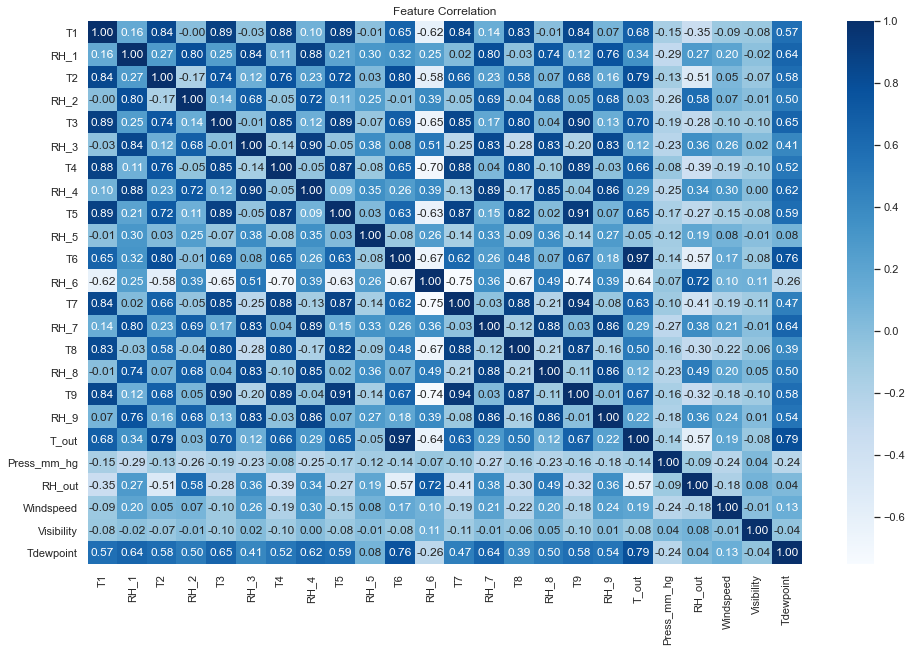

In [68]:
plt.rcParams['figure.figsize'] = (16,10)
#cmap = sns.color_palette('Blues',as_cmap=True)
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f",cmap='Blues')
plt.title('Feature Correlation')
plt.show()

Energy Usage over time

In [105]:
NUM_DAYS = 5 # Number of days to visualize
NUM_OBS = NUM_DAYS*144 # Number of observations commensurate with NUM_DAYS.

In [106]:
temporal_usage = energy_data[['date','Appliances','lights']].iloc[:NUM_OBS,:] # First 200 rows

usage_unpivoted = pd.melt(frame=temporal_usage, id_vars=['date'], var_name='usage_type',
                          value_vars=['Appliances','lights'], value_name='consumption_kwh')
usage_unpivoted.head()

,date,usage_type,consumption_kwh
0,2016-01-11 17:00:00,Appliances,60
1,2016-01-11 17:10:00,Appliances,60
2,2016-01-11 17:20:00,Appliances,50
3,2016-01-11 17:30:00,Appliances,50
4,2016-01-11 17:40:00,Appliances,60


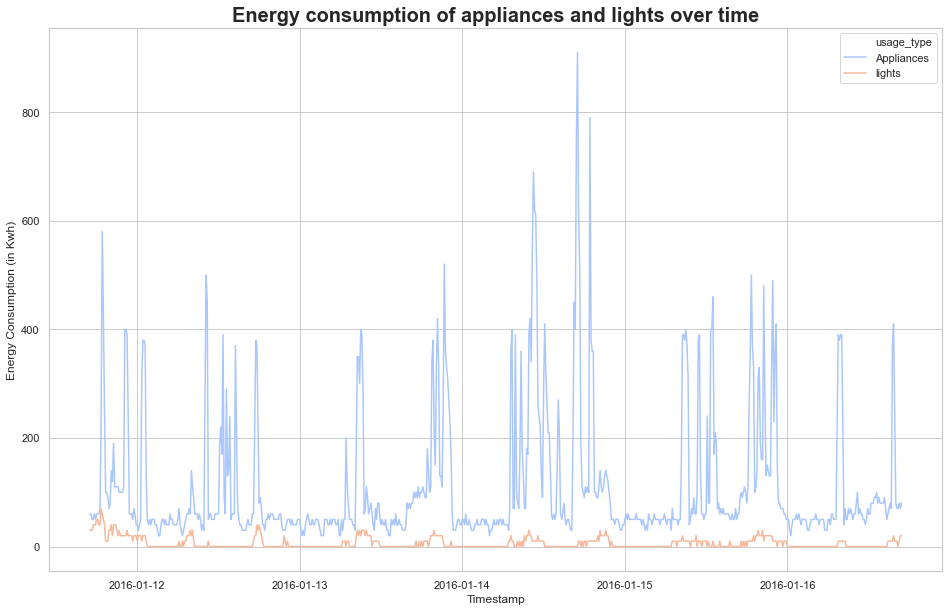

In [107]:
sns.set_palette('Reds')
sns.lineplot(x='date',y='consumption_kwh',hue='usage_type',data=usage_unpivoted,
             palette=sns.color_palette('coolwarm',n_colors=2))
plt.ylabel('Energy Consumption (in Kwh)')
plt.xlabel("Timestamp")
plt.title('Energy consumption of appliances and lights over time', fontdict={'fontsize':20, 'fontweight':'bold'})
plt.show()

**NOTE**: Aggregated appliance energy consumption far outmeasures energy consumption for lighting

## Data Preprocessing

In [22]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [57]:
# define scaler
mm_scaler = MinMaxScaler()

In [63]:
feature_columns = energy_data.columns.tolist()[3:]
target_columns = energy_data.columns.tolist()[1:3]

In [64]:
energy_data_scaled = mm_scaler.fit_transform(energy_data.iloc[:,1:])
energy_data_scaled_df = pd.DataFrame(energy_data_scaled,columns=[*feature_columns,*target_columns])
energy_data_scaled_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


## Modelling

In [116]:
# Imports models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Imports metrics
from sklearn.metrics import mean_absolute_error

# Imports model selection functions
from sklearn.model_selection import train_test_split, TimeSeriesSplit,cross_val_score, GridSearchCV

# Support for multiple-output regression
from sklearn.multioutput import MultiOutputRegressor

In [117]:
tsfolds = TimeSeriesSplit(n_splits=5) # Time Series Split

In [113]:
str(LinearRegression()).rstrip('()')

'LinearRegression'

### Model Scoring

In [121]:
features, targets = energy_data_scaled[:,:-2], energy_data_scaled[:,-2:]

In [139]:
X_train, X_test, ytrain, ytest = train_test_split(features, targets, test_size=0.3, shuffle=False)

Scoring the various models : `bare LinearRegression`, `RidgeRegression`, `Lasso` and `ElasticNet`

In [140]:
model_scores = []
models = list(zip([str(el()).rstrip('()') for el in [LinearRegression, Ridge, Lasso, ElasticNet]],
              [LinearRegression, Ridge, Lasso, ElasticNet]))
for name, model in models:  
    regressor = MultiOutputRegressor(model())
    scores = cross_val_score(estimator=regressor,X=X_train,y=ytrain,scoring='neg_mean_absolute_error',cv=tsfolds)
    mean_score = np.abs(np.mean(scores))
    model_scores.append((name, mean_score))
    print('{} exhibits a mean absolute error of {}'.format(name, mean_score))

LinearRegression exhibits a mean absolute error of 0.2534059986171159
Ridge exhibits a mean absolute error of 0.2529086458964779
Lasso exhibits a mean absolute error of 0.2518085281820997
ElasticNet exhibits a mean absolute error of 0.2518085281820997


In [141]:
top_model = sorted(model_scores, key=lambda item: item[1])[0] # Sort by score amd extract first
print('Top performing model is {} with mean_absolute error of {}'.format(top_model[0], top_model[1]))

Top performing model is Lasso with mean_absolute error of 0.2518085281820997


In [147]:
lasso_grid = {'estimator__alpha' : [0.2, 0.5, 0.8, 1]}

In [148]:
regressor = MultiOutputRegressor(Lasso())
lasso_grid_search = GridSearchCV(estimator=regressor,cv=tsfolds,param_grid=lasso_grid)

In [149]:
results = lasso_grid_search.fit(X=X_train, y=ytrain)

In [151]:
results

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=MultiOutputRegressor(estimator=Lasso()),
             param_grid={'estimator__alpha': [0.2, 0.5, 0.8, 1]})

In [153]:
cv_res = pd.DataFrame(results.cv_results_)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044391,0.020636,0.007473,0.003402,0.2,{'estimator__alpha': 0.2},-0.000297,-0.007406,-0.000706,-0.000097,-0.000044,-0.00171,0.002857,1
1,0.083057,0.056381,0.010173,0.002094,0.5,{'estimator__alpha': 0.5},-0.000297,-0.007406,-0.000706,-0.000097,-0.000044,-0.00171,0.002857,1
2,0.058265,0.017194,0.007067,0.001814,0.8,{'estimator__alpha': 0.8},-0.000297,-0.007406,-0.000706,-0.000097,-0.000044,-0.00171,0.002857,1
3,0.038436,0.021948,0.006219,0.001873,1,{'estimator__alpha': 1},-0.000297,-0.007406,-0.000706,-0.000097,-0.000044,-0.00171,0.002857,1


In [154]:
results.best_params_

{'estimator__alpha': 0.2}

In [156]:
best_model = results.best_estimator_
best_model

MultiOutputRegressor(estimator=Lasso(alpha=0.2))